<a href="https://colab.research.google.com/github/MMartinez0/IAyRN_AgoDic2024/blob/main/Actividad_7_Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

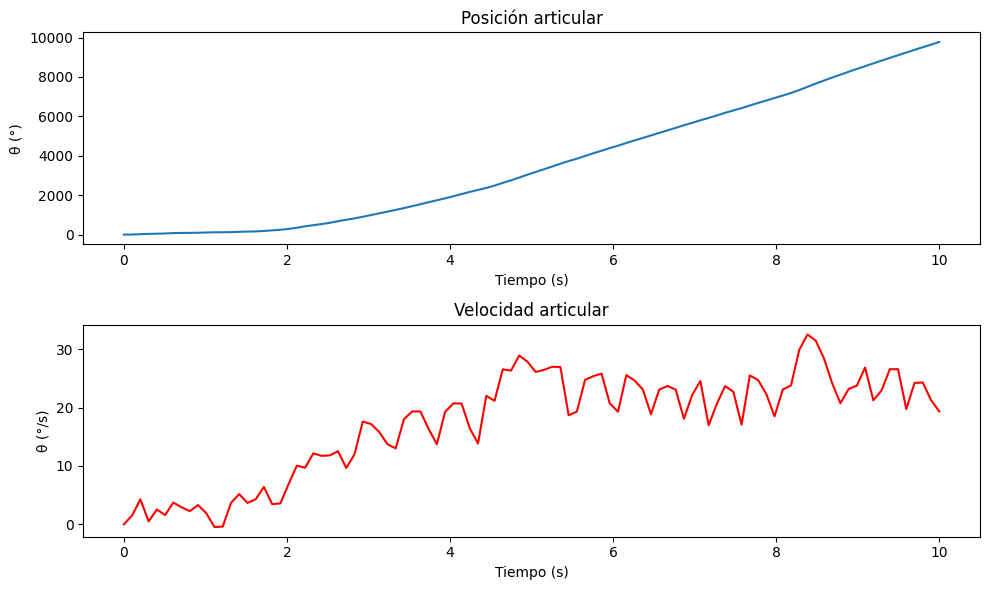

In [2]:
def robot2gdl(t, x):
    q = np.array([x[0], x[1]])  # Vector de posición articular
    qp = np.array([x[2], x[3]])  # Vector de velocidad articular

    # Matriz de inercia
    M = np.array([
        [3.117 + 0.2 * np.cos(q[1]), 0.108 + 0.1 * np.cos(q[1])],
        [0.108 + 0.1 * np.cos(q[1]), 0.108]
    ])

    # Matriz de fuerzas centrípetas y de coriolis
    C = np.array([
        [-0.2 * np.sin(q[1]) * qp[1], -0.1 * np.sin(q[1]) * qp[1]],
        [0.1 * np.sin(q[1]) * qp[0], 0.0]
    ])

    # Vector de pares gravitacionales
    par_grav = np.array([
        39.3 * np.sin(q[0]) + 1.95 * np.sin(q[0] + q[1]),
        1.95 * np.sin(q[0] + q[1])
    ])

    # Vector de fuerzas de fricción viscosas
    fr = np.array([
        1.86 * qp[0] + 1.93 * np.sign(qp[0]),
        0.16 * qp[1] + 0.39 * np.sign(qp[1])
    ])

    # Torque
    tau = np.array([
        11 * (1 - np.exp(-1.8 * t)) + 32.80 + 56 * np.sin(16 * t + 0.1) + 12 * np.sin(20 * t + 0.15),
        1 - np.exp(-1.8 * t) + 12 + 8 * np.sin(26 * t + 0.28) + 8 * np.sin(12 * t + 0.34)
    ])

    # Cálculo de la aceleración articular
    qp2 = np.linalg.inv(M) @ (tau - C @ qp - par_grav - fr)

    return [qp[0], qp[1], qp2[0], qp2[1]]

# Simulación
t_span = (0, 10)  # Tiempo de simulación
x0 = [0, 0, 0, 0]  # Condiciones iniciales

sol = solve_ivp(robot2gdl, t_span, x0, t_eval=np.linspace(0, 10, 100))

# Obtención de coordenadas
theta = np.rad2deg(sol.y[0])  # Convertir a grados
theta_dot = sol.y[2]  # Velocidad articular

# Gráfica de resultados
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(sol.t, theta)
plt.xlabel('Tiempo (s)')
plt.ylabel('θ (°)')
plt.title('Posición articular')

plt.subplot(2, 1, 2)
plt.plot(sol.t, theta_dot, 'r')
plt.xlabel('Tiempo (s)')
plt.ylabel('θ (°/s)')
plt.title('Velocidad articular')

plt.tight_layout()
plt.show()